# Вычислительная математика
## 2.3 Кластеризация

Содержание семинара:

1. __Кластеризация - зачем, что, куда__
    - Типы кластеров

2. __Интерфейс scikit-learn__
    
3. __Методы кластеризации__
    - K-means
        - Пре- и пост- процессинг
    - Иерархическая кластеризация
        - Агломеративный метод. Дендрограмма.

    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    - Другие методы (тысячи их)
    - _Примеры встроенных реализаций_
    
    
4. __Оценка качества кластеризации__
    - Adjusted Rand Index (ARI)
    
    
5. __Домашнее задание__

## Кластеризация - что это и где нужно

В отличие от задачи регрессии и классификации, часто стоит вопрос о поиске необнаруженных закономерностей в наборе числовых данных, без предварительно раставленных лэйблов.

**Кластерный анализ** или __сегментация данных__, - это разновидность метода _обучения без учителя_, целью которого является группировка совокупности объектов в **кластеры** таким образом, чтобы элементы внутри каждого кластера были более связаны (или _схожи_, в соответствии с подходящим понятием сходства, которое зависит от приложения) друг с другом, чем объекты в разных кластерах.  Другими словами, задача состоит в том, чтобы минимизировать внутрикластерные расстояния и максимизировать межкластерные.

Фактически, имеем набор объектов $\left\{x_i \right\} _{i=1}^{N}$, которые хотим раскидать по `n_clusters` кластерам согласно какой-либо метрике и алгоритму - __задача кластеризации__. Заметим, что решение этой задачи неоднозначно ([теорема Клейнберга](https://www.researchgate.net/publication/2557419_An_Impossibility_Theorem_for_Clustering)), и различные алгоритмы предположения об общем количестве кластеров приводят к разным результатам.

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/n_of_clusters.jpg?raw=1" alt="Three different assumptions about the number of clusters" style="display:block; margin-left: auto; margin-right: auto; width:70em"/>

Можно выделить два основных вида алгоритмов кластеризации:

- **Разделяющая кластеризация**: каждый объект принадлежит ровно одному кластеру. Известным алгоритмом, относящимся к этому семейству, является ***k-means***.
- **Иерархическая кластеризация**: состоит из множества **вложенных кластеров**, организованных в виде дерева.

Partitional clustering           |  Hierarchical clustering
:-------------------------:|:-------------------------:
<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/partitional.jpg?raw=1" alt="Partitional clustering" style="width:30em"/>  |  <img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/hierarchical.jpg?raw=1" alt="Hierarchical clustering" style="width:30em"/>

__Примечание.__ На самом деле видов кластеризации гораздо больше. Например, есть алгоритмы, в которых объекты могут быть приписаны одновременно к нескольким кластерам. Или алгоритмы, где важна форма кластеров. Впрочем, как правило, k-means и DBSCAN являются универсальным решением.

__Примечание.__ Численная природа исходных данных оказывается критично важной, так как все алгоритмы кластеризации используют числовые расстояния между объектами. Человечество лишь в последние годы научилось худо бедно аккуратно превращать любые данные в вектора (см. embedding).

__Примечание (самое важное).__ Все алгоритмы кластеризации используют расстояние между точками, соответственно, можно получать совершенно другие результаты используя неевклидову норму между векторами. Выбор подходящей метрики - ключевой аспект всей кластеризации (как говорится, не Евклидом едины).

## Интерфейс Scikit-Learn.


Scikit-Learn, или коротко Sklearn - библиотека, в которой реализованы практически все используемые сегодня алгоритмы машинного обучения. Нам необходимо познакомиться с интерфейсом библиотеки, чтобы понимать, как ее можно использовать на практике. Далее в курсе мы будем не только использовать готовые реализации из sklearn, но иногда и сами реализовывать алгоритмы в том же духе, в котором это сделано в этой библиотеке (с тем же интерфейсом).


Для реализации алгоритмов машинного обучения в sklearn всегда используется один интерфейс - класс с функциями fit(X, Y) для обучения модели по обучающей выборке  и predict(X) (или fit_predict(X)) для возвращения предсказаний на выборке .

При создании класса можно указывать дополнительные параметры, влияющие на работу алгоритма машинного обучения.


Например, такова будет логика работы класса линейной регрессии:


- При создании класса нужно запомнить коэффициент регуляризации;

- Задача функции fit - по выборке X и Y найти веса w и сохранить их внутри класса в self.w;

- Задача функции predict - по весам self.w и X вернуть предсказания
.

 Общая схема решения задачи машинного обучения

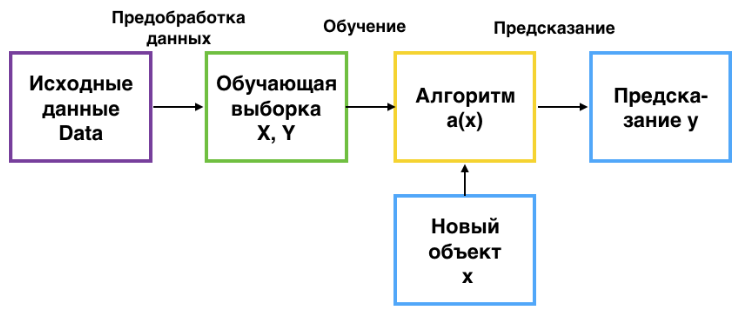

В sklearn все алгоритмы кластеризации тоже реализованы с помощью классов. Их описание можно почитать здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

## Методы кластеризации
### K-means

Идея проста - фиксируем количество кластеров $k$. По итогу, каждый $x_i$ должен быть в том кластере, к центру масс которого он ближе всего. Алгоритм:

>- Инициализируем центроиды (центры масс) кластеров $\mu_1, \dots, \mu_k \in \mathbb{R}^n$.
>- Повторять до сходимости:  
>   - Для каждой точки $x^{(i)}$ находим ближайший к ней центр масс $$c^{(i)} = \arg \underset{j}{\min}{\Vert x^{(i)} - \mu_j \Vert^2}$$
>
>   - Для каждого $j$ переопределяем центры масс исходя из ближайших точек на прошлом шаге $$\mu_j = \frac{\sum_{i=1}^{N} 1\{c^{(i)} = j\} \cdot x^{(i)}}{\sum_{i=1}^{N} 1\{c^{(i)} = j\}}$$
    
В алгоритме $k$ - это параметр, обозначающий количество кластеров, __фиксируется изначально__. Центроиды $\mu_j$ представляют собой наши текущие предположения о положении центров кластеров. Инициализация центроидов может происходить различными способами, например, мы можем случайным образом выбрать $k$ точек из обучающего множества.

Шаги алгоритма:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/k_means.jpg?raw=1" alt="Three different assumptions about the number of clusters" style="display:block; margin-left: auto; margin-right: auto; width:70em"/>

Алгоритм очень прост и, как правило, работает хорошо на данных, где "истинные" кластеры далеки друг от друга. Тем не менее, он будет плохо работать, если "истинные" кластеры находятся близко к друг другу, или далеки по своей форме от шара.

__Примечение о сходимости.__ Введём так называемую __distortion function__:

$$J(c, \mu) = \sum_{i=1}^{N} \Vert x^{(i)} - \mu_{c^{(i)}} \Vert^2$$

$J$ равна сумме квадратов расстояний между каждым $x^{(i)}$ и центром масс кластера $\mu_{c^{(i)}}$, к которому он был отнесен. Внутренний цикл k-means многократно минимизирует $J$ по отношению к $c$ при фиксированном $\mu$, затем минимизирует $J$ по отношению к $\mu$ при фиксированном $c$. Таким образом, $J$ монотонно убывает и может служить параметром сходимости.

На самом деле возможно, что k-means колеблется между несколькими различными кластеризациями, которые дают одинаковые значения $\mu$ и/или $c$. $J$ - невыпуклая функция, поэтому координатный спуск по $J$ не гарантирует сходимость к глобальному минимуму. В качестве обходного пути можно использовать многократный запуск k-means, выбирая в итоге кластеризацию, дающую наименьшее distortion.

__Примечание о выборе количества кластеров.__ В k-means мы заранее обязаны выбрать количество кластеров $k$ или `n_clusters`. В то же время, как правило, мы не знаем сколько их вообще должно быть. Возможные пути работы с этой проблемой:

- Запустить k-mean несколько раз, каждый раз с разным числом кластеров, и в итоге выбрать кластер с наименьшим distortion (с этим поаккуратнее, можете ещё "занулить" $J$)

- Использовать другие алгоритмы кластеризации, в которых `n_clusters` не фиксировано.

__Примечание об обработке данных.__ Естественно, лучше нормировать изначальные данные, чтобы подавить всякие нелинейности и выбросы. После выполнения алгоритма (пост-процессинг), можно, например, удалить кластеры с маленьким числом объектов, сказав, что это выбросы.

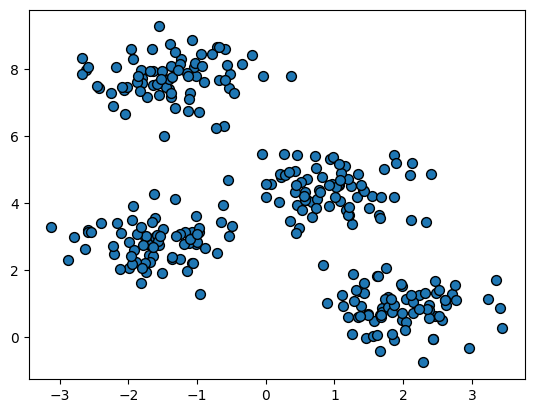

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Генерация случайных данных с помощью функции make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Визуализация сгенерированных данных
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

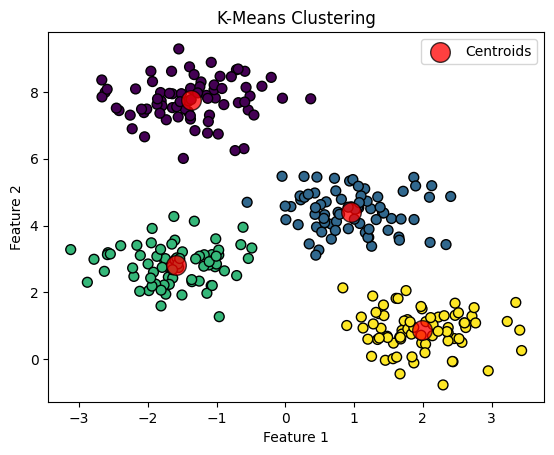

In [ ]:
# Инициализация и обучение модели k-means
kmeans = KMeans(n_clusters=4, n_init = 'auto') # Позапускайте несколько раз с разными n_clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Вывод
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids', edgecolor='k')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Иерархическая кластеризация

В отличие от K-means, где требуется предварительно выбрать количество кластеров и начальную конфигурацию, в алгоритмах гирархической кластеризации этого не требуется. Вместо этого необходимо задать **меру несходства (linkage)** между **группами объектов (подкластерами)**.

Эта мера основана на попарном несходстве между двумя группами (подкластерами или самими кластерами). Эти алгоритмы создают иерархию кластеров, в которой кластеры определенного уровня создаются путем слияния кластеров следующего, более низкого уровня. Корнем этой структуры является кластер, содержащий все данные, а __листьями__ - кластеры, состоящие из одного объекта.

Существуют две основные парадигмы:
- **Агломеративная**: она начинается с объектов как отдельных кластеров. Затем **сливается пара** кластеров на определенном уровне, **имеющих наименьшее межгрупповое несходство**, с целью получения одного, более крупного кластера на верхнем уровне. В агломеративных методах несходство между объединяемыми кластерами является *монотонно возрастающим*.
- **Дивизивная**: заключается в **разбиении** существующего кластера с целью получения двух новых групп, имеющих **большее межгрупповое несходство**.

Каждый уровень иерархии представляет собой группировку данных в неравнозначные множества. Необходимо выбрать уровень, который представляет собой удовлетворительную кластеризацию.

Сложно, да? На практике, оно выглядит попроще.

__Дендрограмма.__

Графически представить последовательность группировок подкластеров (иерархию) можно с помощью **дендрограммы** - дерева, где по оси абсцисс откладывается логическое расстояние (согласно заданной метрике) между кластерами, а высота каждого узла пропорциональна величине межгруппового несходства между двумя его дочерними элементами. Другими словами, чем выше связь между двумя кластерами, тем сильнее различаются их признаки. Чем ниже в дереве сливаются группы наблюдений, тем более схожи их наблюдения. С другой стороны, наблюдения, объединившиеся позже, вблизи корня дерева, могут быть совершенно разными.

Если разрезать дендрограмму по горизонтали на определенной высоте, то данные разделятся на кластеры, представленные вертикальными линиями, пересекающими разрез. Таким образом, на одной дендрограмме можно получить любое количество кластеров в зависимости от высоты горизонтального разреза.

**Примечание:** Для определения "правильного" количества кластеров, нужно использовать определенные метрики качества кластеризации (см. ниже). Строить дендрограмму для тысяч объектов и что-то по ней глазками понять - как правило не очень хороший подход.

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/dendrogram.jpg?raw=1" alt="Dendrogram corresponding to a dataset of 9 elements with 2 features" style="display:block; margin-left: auto; margin-right: auto; width:45em"/>

На рисунке видно, что, хотя на дендрограмме (слева) $2$ и $9$ расположены относительно близко друг к другу, они сильно отличаются, так как $9$ не более похож на $2$, чем на $5, 8$ или $7$. Поэтому мы делаем вывод о несходстве двух наблюдений не по их расположению вдоль горизонтальной оси, а по вертикальной оси, где сливаются две содержащие их группы.

__Меры несходства. Агломеративная кластеризация.__

В агломеративной кластеризации в начале каждый объект представляет собой одиночный кластер. На каждом из $N-1$ шагов мы **объединяем два наименее непохожих кластера** (два ближайших кластера по мере несходства), получая на один кластер меньше на верхнем уровне. Приведём некоторые мерами несходства $d(G,H)$ между двумя группами (подкластерами, кластерами) $G$ и $H$:

- __Ближайший сосед (Single linkage, nearest neighbor)__

Берём в качества меры несходства минимальное расстояние между парой объектов в подкластерах $G$ и $H$:

$$d_{SL}(G,H) = \min_{i\in G,\; i' \in H} d_{ii'}$$

Выбор такой меры несходства приводит к образованию кластеров с очень большим диаметром $D_G = \max_{i\in G,\; i'\in G}d_{ii'}$, что чревато нарушением свойства *компактности* - наличия в кластере наблюдений, которые все относительно похожи на наблюдения в том же кластере, хотя для любого объекта в кластере найдётся похожий на него.

- __Дальний сосед (Complete linkage, furthest neighbor)__

Берём в качества меры несходства максимальное расстояние между парой объектов в подкластерах $G$ и $H$:

$$d_{CL}(G,H) = \max_{i\in G,\; i' \in H} d_{ii'}$$

Такая мера стремится создавать кластеры с малым диаметром, считая два кластера близкими только в том случае, если __все их объекты относительно похожи__. Следовательно, он может нарушать свойство *близости*, причисляя объекты к кластеру, даже если они ближе к членам других кластеров. Он менее восприимчив к шуму и выбросам, но имеет тенденцию к разрушению больших кластеров.

- __Групповое среднее (Group average)__

Берём в качестве меры несходства кластеров $G$ и $H$ среднее расстояние между парами их элементов (учитываем количество элементов в кластерах $N_G$ and $N_H$):

$$d_{GA}(G,H) = \frac{1}{N_G N_H} \sum_{i \in G} \sum_{i' \in H} d_{ii'}$$

Как правило, образуются относительно компактные кластеры, расположенные на достаточно большом расстоянии друг от друга.

- __ward__

Вместо расстояния, стараемся минимизировать дисперсию объединения кластеров $G$ и $H$. Соответсвующая мера несходства:

$$
d_{ward}(G,H)=\sum_{i \in G \, \cup H}\left\|\vec{x_i}-\vec{m}_{G \, \cup H}\right\|^2-\sum_{i \in G}\left\|\vec{x_i}-\vec{m}_G\right\|^2-\sum_{i \in H}\left\|\vec{x_i}-\vec{m}_H\right\|^2=\frac{N_G N_H}{N_G+N_H}\left\|\vec{m}_G-\vec{m}_H\right\|^2
$$

где $\vec{m}_A$ - центр масс подкластера $A$.

Результат обычно похож на групповое среднее, но устойчивее к выбросам.

<img src="https://cdn.mathpix.com/snip/images/k7215JBP7k2vfgLOofcY5U1JgVuMeuKZWwkhwLNvPok.original.fullsize.png" alt="Ha-ha" style="display:block; margin-left: auto; margin-right: auto; width:50em"/>


__Алгоритм агломеративной кластеризации__

Для учета расстояний (сходства или несходства) между точками данных используется **матрица смежности**, которая изначально представляет собой $N\times N$ матрицу $D$, где $N$ - общее количество объектов, а каждый элемент $d_{ii'}$ фиксирует меру несходства между $i$-ым и $i'$-ым объектами. В большинстве алгоритмов предполагается матрица $D$ с неотрицательными элементами и нулевыми диагональными элементами: $d_{ii}=0\; i=1,\dots,N$. Также в большинстве алгоритмов предполагается симметричная матрица смежности.

Собственно, алгоритм:
>```python
Let each data point be a cluster
Compute the proximity matrix D
while (n_of_clusters > 1):
    Merge two clusters according to the dissimilarity measure used  
    Update the proximity matrix
>```

Cложность по памяти составляет $O(N^2)$ из-за матрицы смежности. Вычислительная сложность во многих случаях может составлять $O(N^3)$, поскольку существует $N$ циклов, и на каждом цикле необходимо обновлять и перебирать $N\times N$ матрицу. В любом случае, при некоторых подходах сложность может быть снижена до $O(N^2 \log N)$.

__Пример__

В данном примере мы будем проводить агломеративную кластеризацию с одинарной связью (с использованием меры несходства ближайшего соседа). Пусть матрица близости $D$, соответствующая исходному набору данных, имеет вид:

|    |  p1  |  p2  |  p3  |  p4  |  p5  |  p6  |
|:--:|:----:|:----:|:----:|:----:|:----:|:----:|
| **p1** |   0  | 0.24 | 0.22 | 0.37 | 0.34 | 0.23 |
| **p2** | 0.24 |   0  | 0.15 | 0.20 | 0.14 | 0.25 |
| **p3** | 0.22 | 0.15 |   0  | 0.15 | 0.28 | **0.11** |
| **p4** | 0.37 | 0.20 | 0.15 |   0  | 0.29 | 0.22 |
| **p5** | 0.34 | 0.14 | 0.28 | 0.29 |   0  | 0.39 |
| **p6** | 0.23 | 0.25 | **0.11** | 0.22 | 0.39 |   0  |

Наиболее похожими кластерами (пока это одиночные объекты), согласно метрике ближайшего соседа, являются `p3` и `p6`. Поэтому мы объединяем их в один кластер и переходим к пересчету матрицы смежности $D$. Заметим, что вычислять нужно только значения, принадлежащие новой строке и новому столбцу `p3 и p6`:

|         |  p1  |  p2  | p3 & p6 |  p4  |  p5  |
|:-------:|:----:|:----:|:-------:|:----:|:----:|
|    **p1**   |   0  | 0.24 |   0.22  | 0.37 | 0.34 |
|    **p2**   | 0.24 |   0  |   0.15  | 0.20 | **0.14** |
| **p3 & p6** | 0.22 | 0.15 |    0    | 0.15 | 0.28 |
|    **p4**   | 0.37 | 0.20 |   0.15  |   0  | 0.29 |
|    **p5**   | 0.34 | **0.14** |   0.28  | 0.29 |   0  |

Теперь наиболее похожими кластерами являются `p2` и `p5`. Пересчитаем матрицу смежности:

|         |  p1  | p2 & p5 | p3 & p6 |  p4  |
|:-------:|:----:|:-------:|:-------:|:----:|
|    **p1**   |   0  |   0.24  |   0.22  | 0.37 |
| **p2 & p5** | 0.24 |    0    |   0.15  | 0.20 |
| **p3 & p6** | 0.22 |   0.15  |    0    | 0.15 |
|    **p4**   | 0.37 |   0.20  |   0.15  |   0  |

В этот момент мы можем объединить `p4` с `p3 и p6` и продолжать строить дендрограмму, пока не останется один кластер. В результате мы получим следующее:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/agglomerative_min.png?raw=1" alt="Result of applying single linkage agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

Если бы вместо этого мы выбрали агломеративную кластеризацию **дальнего соседа** (Complete linkage), то в результате получили бы:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/agglomerative_max.png?raw=1" alt="Result of applying complete linkage agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

Если бы в противном случае мы выбрали агломеративную кластеризацию **группового среднего**, то результат был бы следующим:

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/agglomerative_group.png?raw=1" alt="Result of applying group average agglomerative clustering on an example" style="display:block; margin-left: auto; margin-right: auto; width:36em"/>

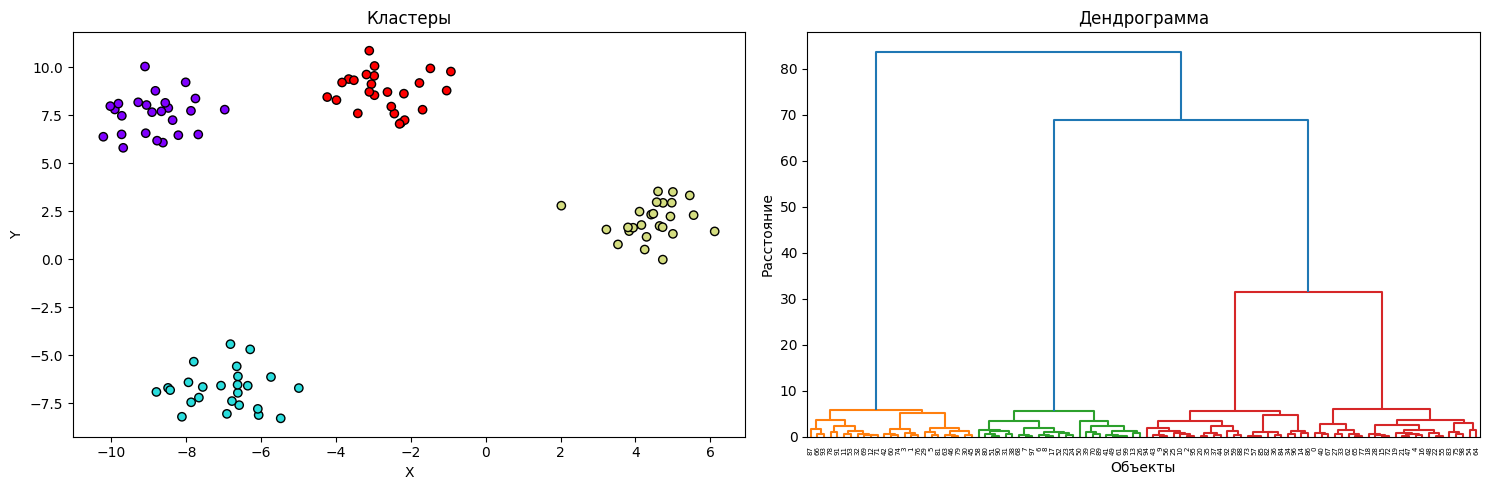

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Генерация данных
X, y = make_blobs(n_samples=100, centers=4, random_state=42)

# Агломеративная кластеризация
agglom_clustering = AgglomerativeClustering(n_clusters=4,
                                            linkage = 'ward') # n_clusters - где обрезать дендрограмму
clusters = agglom_clustering.fit_predict(X)

# Ссылка
Z = linkage(X, method='ward')

# Создание субплотов
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Левый субплот с кластерами
axs[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
axs[0].set_title('Кластеры')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Правый субплот с дендрограммой
dendrogram(Z, ax=axs[1])
axs[1].set_title('Дендрограмма')
axs[1].set_xlabel('Объекты')
axs[1].set_ylabel('Расстояние')

plt.tight_layout()
plt.show()


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN - это алгоритм кластеризации, в котором, в отличие от k-means, кластер определяется как непрерывная область с высокой плотностью. Под плотностью понимается количество точек в пределах заданного радиуса $\varepsilon$.

Некоторые важные определения:

**Определение (Core point)**: Точка называется **основной (коровой, опорной)**, если в пределах $\varepsilon$ она имеет более чем заданное количество точек (`min_samples`). Смысл - это точки, находящиеся во внутренности кластера.

**Определение (граничная точка)**: Точка называется **граничной**, если она имеет меньше `min_samples` в пределах $\varepsilon$, но находится в окрестности основной (коровой, ядровой) точки.

**Определение (точка шума)**: Любую точку, которая не является ни основной, ни пограничной, назовём __шумом__.

Гиперпараметры метода здесь "критерий коровости точки" `min_samples` и радиус коровых точек $\varepsilon$.

Алгоритм:

>1. Для каждого объекта подсчитать, сколько других объектов попадает в его окрестность радиуса $\varepsilon$.
>    - Если в окрестности $\varepsilon$ объектов находится минимум `min_samples`, то он обозначается как основной (core) объект.  
>    - Если объект имеет меньше `min_samples` в $\varepsilon$-окрестности, но при этом попадает в $\varepsilon$-окрестность какого-либо основного (core) объекта, то пометим его как граничную точку.
>    - В противном случае удалим объект, так как он является точкой шума.
>
>
>2. Все основные точки в пределах $\varepsilon$ от друг друга назвать кластером.
>3. Присвоить каждую граничную точку в ближайший к ней кластер.

<img src="https://github.com/pietroventurini/machine-learning-notes/blob/main/images/cluster_analysis/dbscan.jpg?raw=1" alt="Результат применения алгоритма dbscan" style="display:block; margin-left: auto; margin-right: auto; width:50em"/>

**Плюсы:**
- Устойчив к шуму
- Может обрабатывать кластеры различной формы и размера

**Минусы:**
- Плохо работает, когда точки объединены в кластеры с различной плотностью
- Плохо работает с высокоразмерными данными


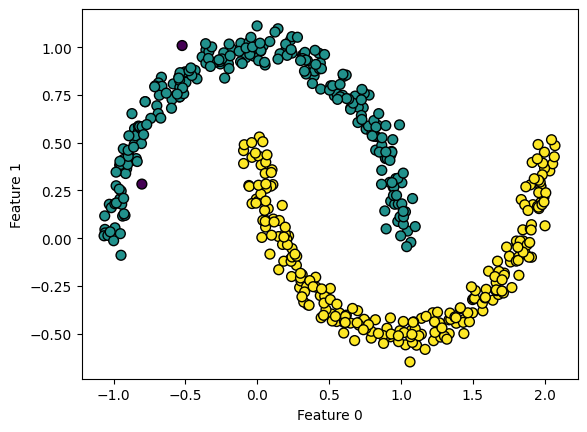

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Генерируем датасет "две луны"
X, y = make_moons(n_samples=500, noise=0.05, random_state=0)

# Применяем DBSCAN
db = DBSCAN(eps=0.1, min_samples=5) # Поиграйтесь с параметрами
clusters = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### Другие алгоритмы

Вообще, алгоритмов кластеризации страшное количество. Можно, например, почитать [документацию sklearn (внимание, красивые картинки)](https://scikit-learn.org/stable/modules/clustering.html#):

![original image](https://cdn.mathpix.com/snip/images/1-KeEK1cpSmfLAdSSIER0H9SpUMfhmhan7-Pm6HCtvo.original.fullsize.png)

## Оценка качества кластеризации

Оценка эффективности алгоритма кластеризации не так проста, как подсчет MSE Loss. В частности, любая метрика оценки должна учитывать не абсолютные значения меток кластеров, а то, определяет ли кластеризация разделение данных, сходное с некоторым истинным набором классов или удовлетворяющее некоторому предположению, например, что члены одного класса более сходны, чем члены разных классов, согласно некоторой мере несходства.

На практике стоит перебирать различные метрики качества для полученных кластеров, чтобы определить наилучшее разделение при отсутствии картинки (или чтобы подбирать гиперпараметры).

__Примечание.__ Картинку-таки можно получить почти для чего угодно. Гуглите t-SNE. Оно в семинар явно не влезает, а штука мемная.


Таких метрик качества кластеризации очень много ([см. пункт 2.3.11.](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)). Их можно разделить на

- __Внешние:__ Мы знаем истинные кластеры, и хотим проверить качество кластеризации, "зная истину". Применимы, когда часть объектов уже кластеризована ручками (можно сказать, классифицирована).

- __Внутренние:__ Не знаем ничего о данных и какие там на самом деле кластеры. Максимально общо, смотрят на "красоту" полученных кластеров с точки зрения какой-либо статистики. На практике, наилучшим образом работает Score Function, хотя в конкретной задаче никто ничего не гарантирует (опять-таки, разумно перебирать разные).

Отмечу, что многие внутренние метрики ломаются, если получился всего один кластер.

Для всех метрик чем больше, тем лучше.

[Хороший обзор всех методов оценки качества кластеризации тут.](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)



,eps,min_samples,ARI,Homogeneity,Completeness,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,0.3,5,0.457188,0.746654,0.525633,-0.025531,56.615042,2.346569
1,0.3,10,0.093600,0.423733,0.389259,-0.250812,21.101147,2.331979
2,0.5,5,0.914246,0.941359,0.852961,0.630380,473.017056,2.782135
3,0.5,10,0.764861,0.849321,0.735182,0.522095,243.583997,2.426602
4,0.5,15,0.594839,0.749542,0.650764,0.387169,132.366505,2.312980
5,0.7,5,0.697922,0.741675,0.939557,0.559707,381.901589,2.065549
6,0.7,10,0.954275,0.961822,0.905730,0.656940,674.309779,2.317169
7,0.7,15,0.900436,0.925353,0.835969,0.619821,488.004158,3.833437


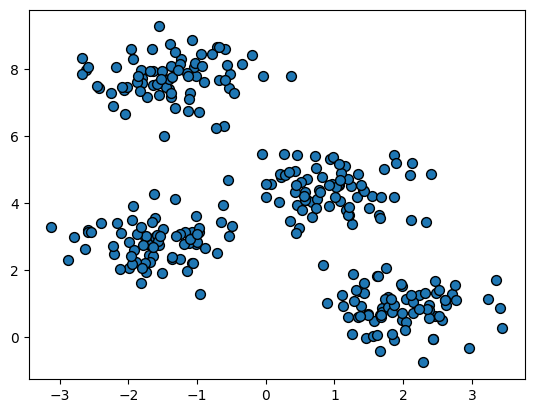

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score # Внешние метрики
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score # Внутренние метрики (не использую label)

# Создаем датасет
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Гиперпараметры для DBSCAN
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

# Пустой DataFrame для хранения результатов
results = pd.DataFrame(columns=['eps', 'min_samples', 'ARI', 'Homogeneity', 'Completeness', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

# Оценка качества кластеризации
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Исключаем кластеризации с одним кластером или с шумом
        if len(set(labels)) > 1 and -1 in labels:
            row_results = pd.DataFrame({
                'eps': [eps],
                'min_samples': [min_samples],
                'ARI': [adjusted_rand_score(y, labels)],
                'Homogeneity': [homogeneity_score(y, labels)],
                'Completeness': [completeness_score(y, labels)],
                'Silhouette': [silhouette_score(X, labels)],
                'Calinski-Harabasz': [calinski_harabasz_score(X, labels)],
                'Davies-Bouldin': [davies_bouldin_score(X, labels)]
            })
            results = pd.concat([results, row_results], ignore_index=True)

# Отображение результатов
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
display(results)


## Домашнее задание


### 1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.



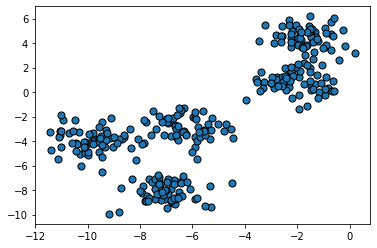

BEst Silhouette:  2
Best Calinski-Harabasz:  5
Best Davies-Bouldin:  9


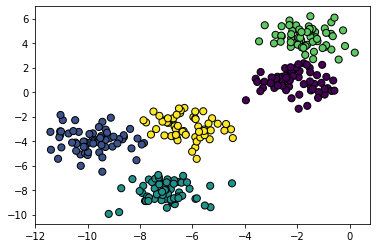

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

max_sil = 0
m_sil = 2
max_cal = 0
m_cal = 2
max_dav = 0
m_dav = 2
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, n_init = 'auto')
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    if max_sil < silhouette_score(X, y_kmeans):
        max_sil = silhouette_score(X, y_kmeans)
        m_sil = i
    if max_cal < calinski_harabasz_score(X, y_kmeans):
        max_cal = calinski_harabasz_score(X, y_kmeans)
        m_cal = i
    if max_dav < davies_bouldin_score(X, y_kmeans):
        max_dav = davies_bouldin_score(X, y_kmeans)
        m_dav = i
    
print('BEst Silhouette: ', m_sil)
print('Best Calinski-Harabasz: ', m_cal)
print('Best Davies-Bouldin: ', m_dav)

kmeans = KMeans(n_clusters=5, n_init = 'auto') # Позапускайте несколько раз с разными n_clusters
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
plt.show()

### 2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели.

### 3. Матрица расстояний и матрица сходств.


$$
\text { Расстояния между парами векторов } d\left(X_l, X_j\right) \text { могут быть представлены в виде симметричной матрицы расстояний: }
$$

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами $G_i$ и $G_j$. Неотрицательная вещественная функция $S\left(X_i , X_j\right)=S_{i j}$ называется мерой сходства, если :


1) $0 \leq S\left(X_i, X_j\right)<1$ для $X_i \neq X_j$

2) $S\left(X_i, X_i\right)=1$

3) $S\left(X_i, X_j\right)=S\left(X_j, X_i\right)$

Пары значений мер сходства можно объединить в матрицу сходства:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют коэффициентом сходства.

Постройте матрицу рассеяний по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства.

Визуализируйте обе матрицы. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) .



### 4. Игрушечные галактики (Источник - Pelican :))

Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


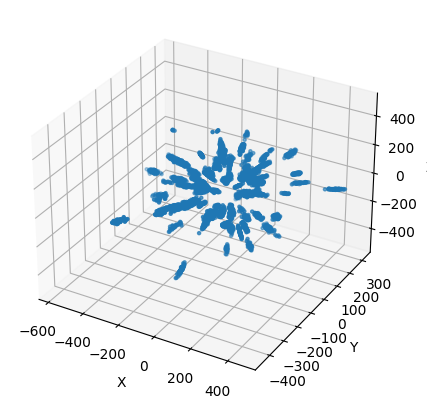

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
#!pip install hdbscan
import hdbscan
from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
# Эта функция понадобится для отображения результата кластеризации и ARI
def plot_galaxies(data,cluster):
    fig = plt.figure(figsize=(5,5))

    ax = fig.add_subplot(111, projection='3d')
    Axes3D.scatter(ax,data.x, data.y, data.z, marker='.', c=cluster.labels_);
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show();

    ARI = round(ari(data.label,cluster.labels_),4) # считаем ARI - оценка качества кластеризации


    print('ARI = {}'.format(ARI))

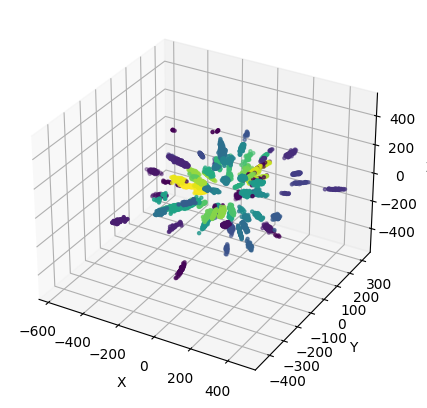

ARI = 0.8682


In [ ]:
# hdbscan работает следующим образом
cluster = hdbscan.HDBSCAN(metric="euclidean",
                          min_cluster_size=9,
                          algorithm="generic",
                          alpha=0.8,
                          cluster_selection_method='eom')

cluster.fit(data[['x','y','z']].to_numpy())

plot_galaxies(data,cluster) # Отображаем кластеризацию и полученный ARI

__Ваша задача__ - перебирать различные параметры hdbscan (метрику, минимальный размер кластера, епсилон и т.д. - надо залезть в документацию hdbscan и посмотреть, что там реализовано), чтобы получить `ARI 0.900` (а вообще, чем больше, тем лучше - удивите нас).

### 5*. EM-алгоритм.


Задача матричного разложения (аппроксимация матрицы произведением двух других матриц меньшего ранга) $c$ ограничениями (например, условие положительности элементов) не решается в общем случае с помощью сингулярного разложения. Для решения такой задачи может использоваться ЕМ-алгоритм. Изучим его на примере другой простой модельной задачи.

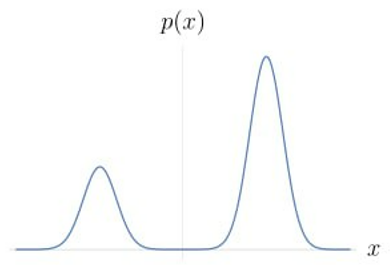

Пусть дана выборка точек $x_i$, взятая из смеси гауссовых распределений:
$$
p(x)=\alpha N_{\mu_1, \sigma_1}(x)+(1-\alpha) N_{\mu_2, \sigma_2}(x) .
$$

Тогда можно поставить задачу оценки параметров $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ по выборке $\left\{x_i\right\}$.
- Покажите, что задача максимизации обычного правдоподобия $\prod_i p\left(x_i\right) \longrightarrow \max _{\alpha, \mu_1, \mu_2}$ плохо определена. Какие значения параметров максимизируют такое правдоподобие?
- Сгенерируйте данные (две сгустка точек должны быть хорошо видны при визуализации) и найдите параметры $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ с помощью ЕМ-алгоритма. Инициализировать параметры можно какими-то случайными значениями.
ЕМ-алгоритм состоит из двух чередующихся шагов:
1. M(Maximization)-шаг. Относим каждую точку $x_i$ к первой или второй гауссиане, сравнивая значения правдоподобия для каждой компоненты смеси:
$$
a\left(x_i\right)= \begin{cases}1, & p_1\left(x_i\right)>p_2\left(x_i\right), \\ 2, & p_2\left(x_i\right)>p_1\left(x_i\right),\end{cases}
$$

где $p_1(x)=\alpha N_{\mu_1, \sigma_1}(x), p_2(x)=(1-\alpha) N_{\mu_2, \sigma_2}(x)$.
2. $\mathrm{E}\left(\right.$ Expectation)-шаг. Находим параметры $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, максимизируя правдоподобие (или его логарифм) отдельно по точкам, отнесенным к каждой гауссиане:
$$
\begin{gathered}
\prod_{x_i: a\left(x_i\right)=1} p_1\left(x_i\right) \longrightarrow \max _{\beta_1, \sigma_1} \\
\prod_{x_i: a\left(x_i\right)=2} p_2\left(x_i\right) \longrightarrow \max _{\mu_2, \sigma_2}
\end{gathered}
$$

При нахождении параметра $\alpha$ можно оптимизировать обычное правдоподобие $\prod_i p\left(x_i\right)$. Все такие максимизации правдоподобия осушествляются аналитически в общем виде для гауссовых распределений Реализуйте ЕМ-алгоритм. Так как метод является итерационным, необходимо выбрать какой-либо критерий остановки, например, прекращать процес, если относительное изменение каждого параметра при очередном шаге меньше некоторого порога. С какой точностью удалось восстановить $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ ?